# Exploration and Analysis of Wine Quality

## **Introduction**

The following notebook contains the steps enumerated below for analyzing characteristics of red and white variants of the Portuguese "Vinho Verde" wine. Quality is based on sensory scores (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).<br> 
Data is available at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality <br>
<br> 
1. [Import Data & Python Packages](#1-bullet) <br><br>
2. [Assess Data Quality & Missing Values](#2-bullet)<br><br>
3. [Exploratory Data Analysis - ggplot for python](#3-bullet) <br>
    * [3.1 Red vs. White wines](#3.1-bullet) <br>
    * [3.2 Facetplot](#3.2-bullet) <br><br>
4. [Correlation Heatmaps - seaborn](#4-bullet) <br>
    * [4.1 Heat Map - Red Wine](#4.1-bullet) <br>
    * [4.2 Heat Map - White Wine](#4.2-bullet) <br>
    * [4.3 Biggest Differences between White and Red Correlations](#4.3-bullet) <br><br>
5. [Predicting Quality: Linear Regression](#5-bullet) <br>
    * [5.1 80-20 Split of Training and Hold-Out Data](#5.1-bullet) <br>
    * [5.2 60-40 Split of Training and Hold-Out Data](#5.2-bullet) <br>
    * [5.3 Segmented LinReg (White & Red Separate Models)](#5.3-bullet) <br><br>
6. [Alternate Approach 1: Support Vector Machine](#6-bullet) <br>

### 1. Import Data & Python Packages <a class="anchor" id="1-bullet"></a>

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from ggplot import *

C:\Users\sgus1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\sgus1\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\sgus1\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
### Load wine quality data into Pandas
### Import raw data from GitHub
url_red = 'https://raw.githubusercontent.com/sgus1318/glossy-chromosome/master/winequality_red.csv'
df_red = pd.read_csv(url_red)

url_white = 'https://raw.githubusercontent.com/sgus1318/glossy-chromosome/master/winequality_white.csv'
df_white = pd.read_csv(url_white)

In [3]:
df_red["color"] = "R"

In [4]:
df_white["color"] = "W"

In [5]:
df_all=pd.concat([df_red,df_white],axis=0)

In [6]:
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [7]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [8]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [9]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [10]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [11]:
df = pd.get_dummies(df_all, columns=["color"])

## 2. Assess Data Quality & Missing Values <a class="anchor" id="2-bullet"></a>

In [12]:
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

#### There are no missing values in this dateset.  Victory!

In [13]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Nothing looks particularly out of place (e.g. no negative values in pH).  Interestingly, no wines scored below a 3 or above a 9 (no perfect 10/10 scores). 

## 3. Exploratory Data Analysis - ggplot for python

### 3.1 Red vs. White wines

In [14]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [15]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


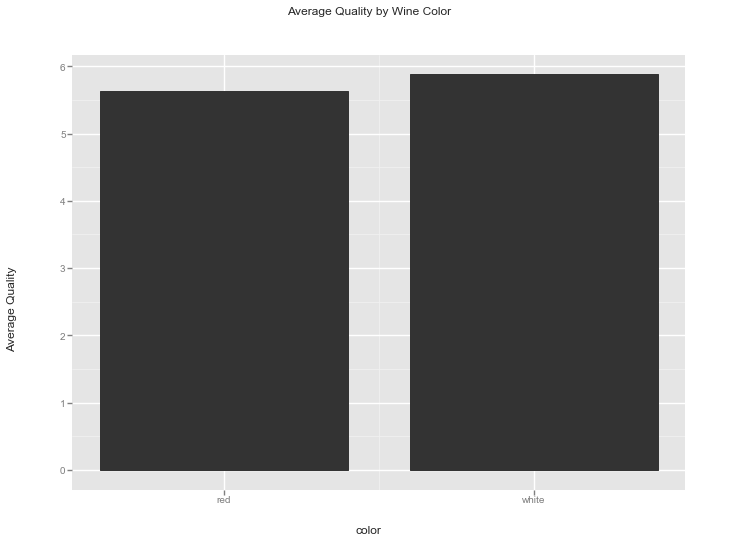

<ggplot: (-9223371908453857739)>

In [16]:
ggplot(df_mean, aes(x='color', weight='mean_quality')) + geom_bar() +\
    labs(y = "Average Quality", title = "Average Quality by Wine Color")

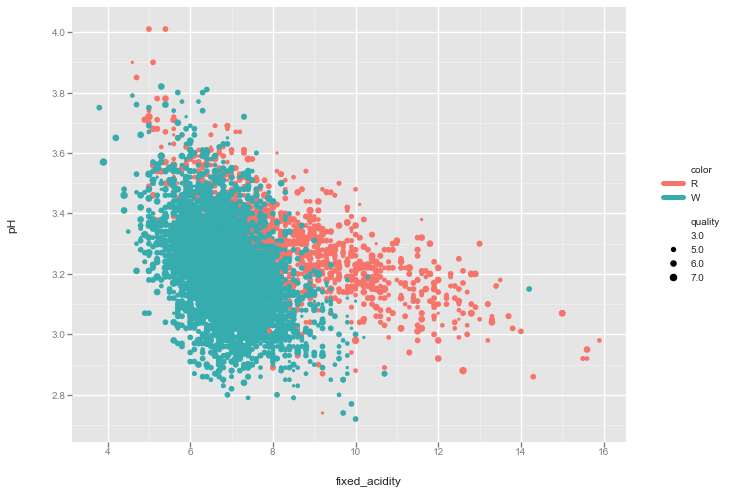

<ggplot: (128400938006)>

In [17]:
ggplot(df_all, aes(x='fixed_acidity', y='pH', color='color',size='quality')) + geom_point()

## 3.2 Facet Plot 

Testing out ggplot's facet plot capabilities on a few of our continuous variables (treating quality as categorical for the purposes of wrapping several plots).

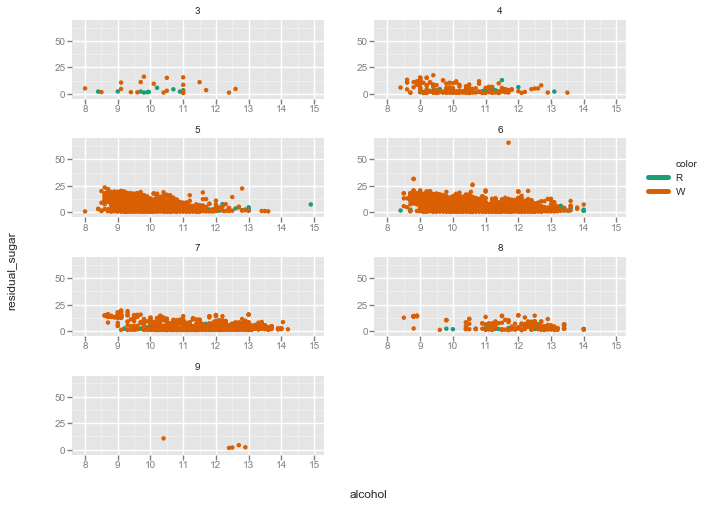

<ggplot: (128401013512)>

In [18]:
ggplot(df_all, aes(x='alcohol', y='residual_sugar', color='color')) + geom_point() +\
    facet_wrap('quality', ncol=2) + scale_color_brewer(type = 'qual', palette = 'Dark2')

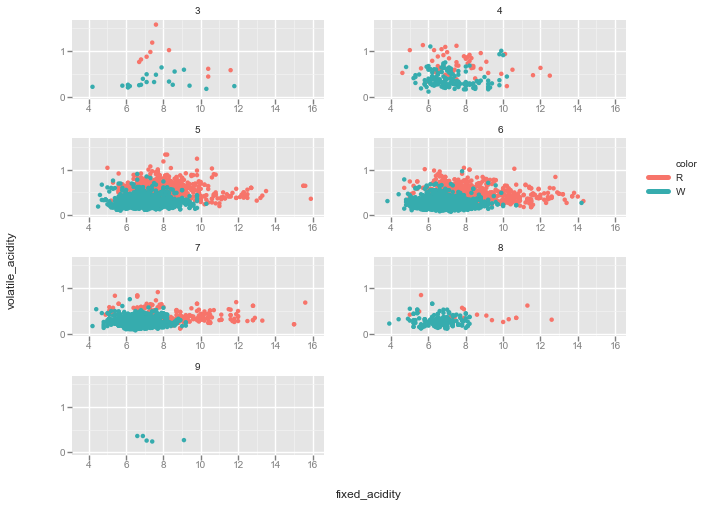

<ggplot: (-9223371908453563420)>

In [19]:
ggplot(df_all, aes(x='fixed_acidity', y='volatile_acidity', color='color')) + geom_point() + facet_wrap('quality', ncol=2)

## 4. Correlation Heat Maps - Seaborn <a class="anchor" id="4-bullet"></a>

## 4.1 Red Wine <a class="anchor" id="4.1-bullet"></a>

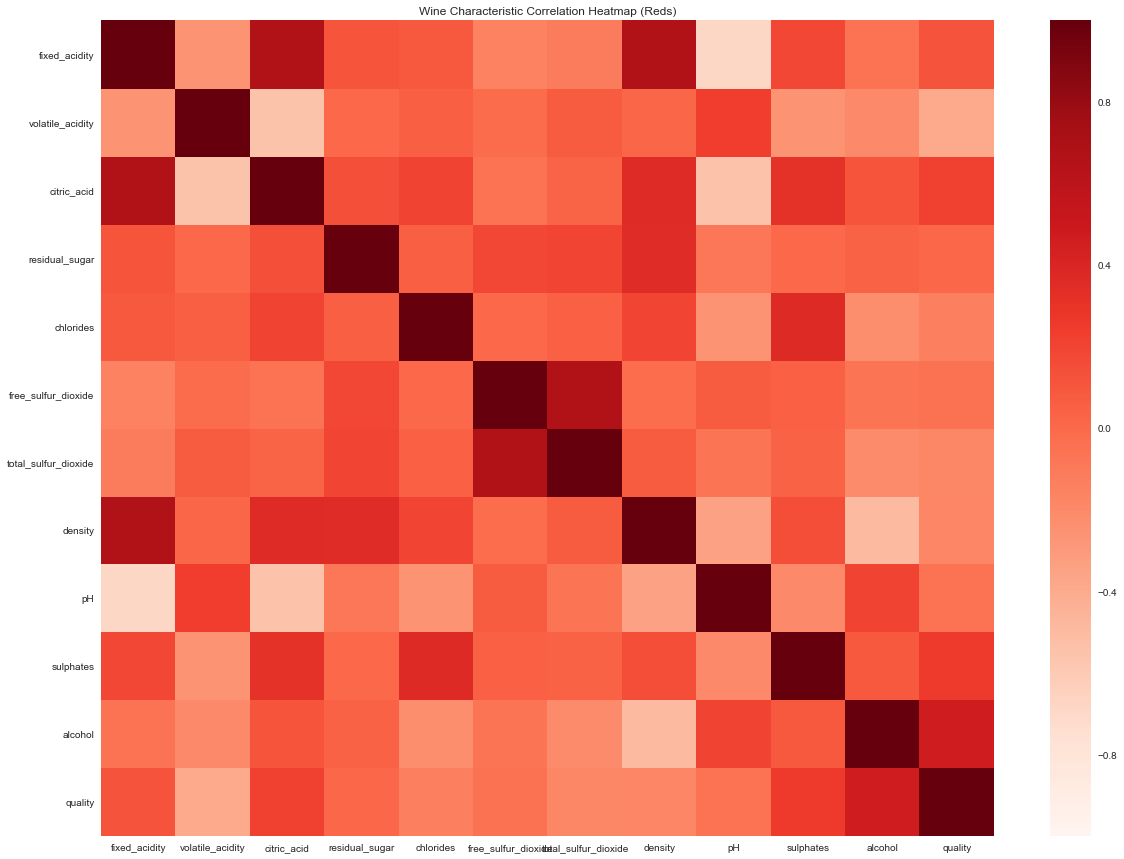

In [20]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

## 4.2 White Wine <a class="anchor" id="4.2-bullet"></a>

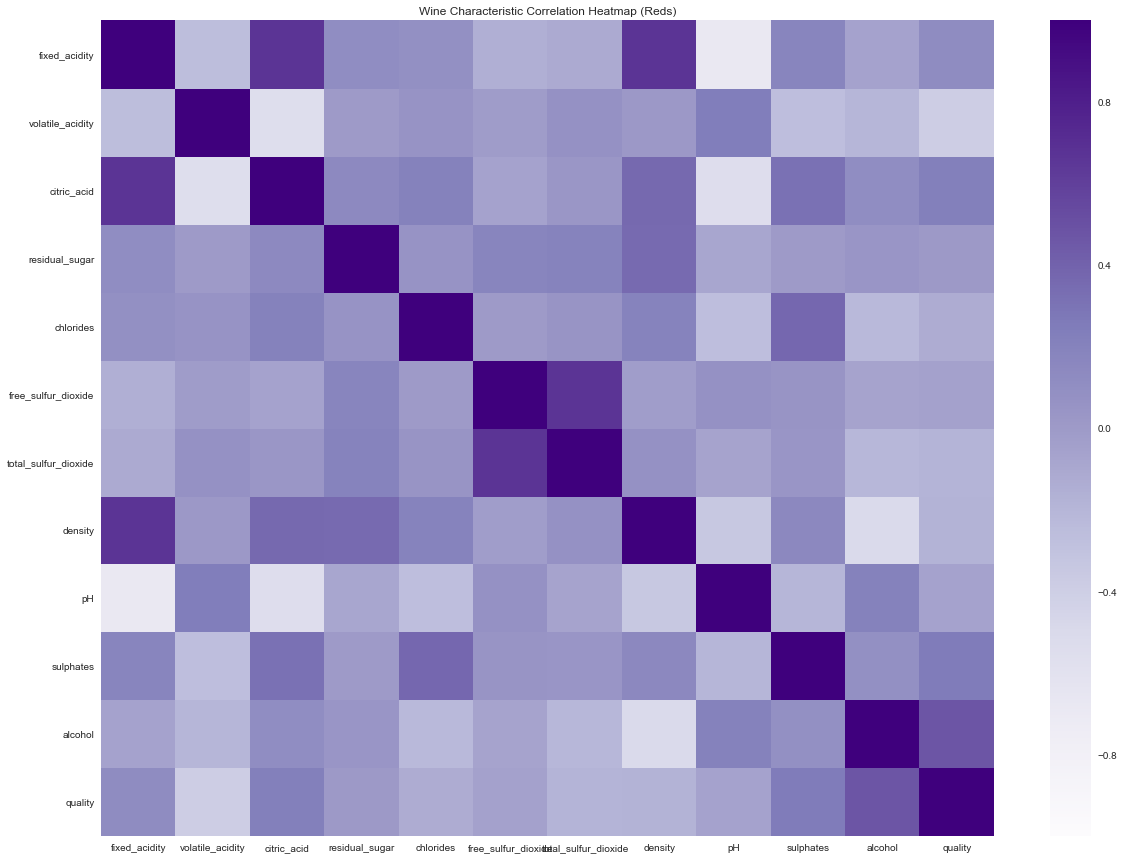

In [21]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")

## 4.3 Biggest Differences between White and Red Correlations <a class="anchor" id="4.3-bullet"></a>

### Red Pearson's Correlation - White Pearson's Correlation <br>
There are some noteable differences in the way that certain variables interact depending on the variety of wine.  The darker the square, the larger the difference that interaction is between Red and White wines. <br><br>
For instance, the correlation between alcohol and sugar content is much higher for Red wines than it is for white wines (boozy reds have more sugar than less alcoholic reds, while boozy whites are more sweet than less alcoholic whites). Closer inspection indicates that the correlation between sugar and alcohol is positive for Red wines (weak positive, 0.042), but it is much more strongly negative for White wines (-0.45). <br><br>

In [22]:
df_r_corr=df_red.corr()
df_w_corr=df_white.corr()

In [23]:
df_r_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [24]:
df_w_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [25]:
diff_corr = df_r_corr - df_w_corr

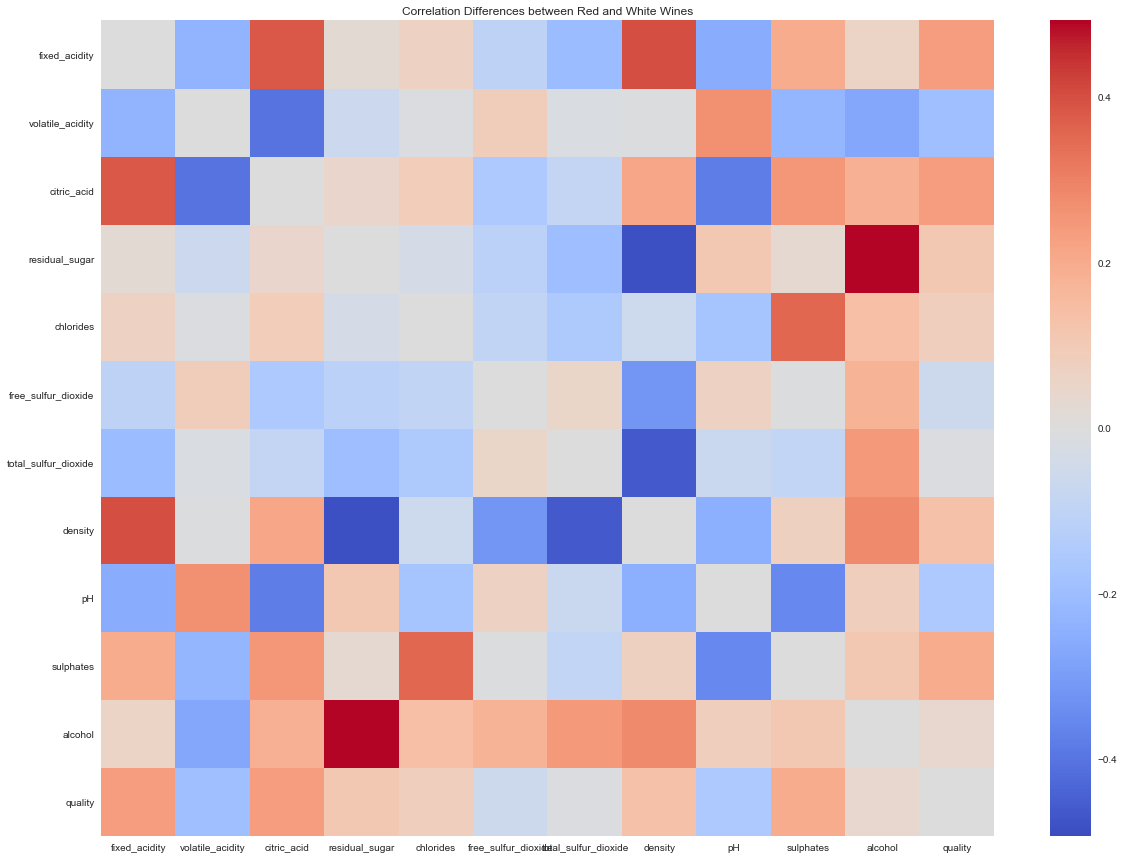

In [26]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

## 5. Predicting Quality: Linear Regression <a class="anchor" id="5-bullet"></a>

## 5.1 80-20 Split of Training and Hold-Out Data <a class="anchor" id="5.1-bullet"></a>

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4) 
## add a starting random point (4) so results can be reproduced 

In [28]:
results1 = smf.ols('quality ~ total_sulfur_dioxide + free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density + color_R', data=df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sun, 21 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:37:04   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.7597 

### Note the warning: 
#### "[2] The condition number is large, 2.93e+05. This might indicate that there is strong multicollinearity or other numerical problems." <br> 
We'll see how our out-of-sample test results perform (if there's a lot of multicollinearity present, we'd expect to see decreased performance)

In [29]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

X=train[cols]

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.54


In [32]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

Xtest=test[cols]

In [33]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.54


#### The out-of-sample MSE isn't too much higher than the train sample, which is a good indication that there isn't too much overfitting in our model.

## 5.2 60-40 Split of Training and Hold-Out Data <a class="anchor" id="5.2-bullet"></a>

In [34]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

In [35]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
ytrain_pred2 = regr.predict(X2)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

In-sample Mean squared error: 0.53


In [37]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [38]:
ypred2 = regr.predict(Xtest2)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest2, ypred2))

Out-of-sample Mean squared error: 0.55


#### Again, the out-of-sample MSE isn't too much higher than the train sample, which indicates the model isn't overfit on the training data. <br>
<br>
*However,* based on our assessment of the correlation heatmap, we can see that there is strong evidence for multicollinearity (total sulur dioxide and free sulfur dioxide are inherently related. The same appears to be true with density, citric acid, and fixed acidity). <br> <br>
What's more, the adjusted R-squared for this model very low, and indicates that only 29.5% of the variation in a wine's quality is due to variation in these variables. <br> <br>
One way we can address this is by building separate regressions for Red and White wine (an easy way to segment the data).  From our heatmaps, we already know that there are certain variables that behave differently given the type of wine.  Before we move onto more advanced modeling techniques, let's just try this approach of splitting the data along color.

## 5.3 LinReg on Segmented Data (80/20 splits for both segments) <a class="anchor" id="5.3-bullet"></a>

### 5.3.1 White Wine Model <a class="anchor" id="5.3.1-bullet"></a>

In [39]:
w_train, w_test = train_test_split(df_white, test_size=0.2)

In [40]:
results_w = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=df_white).fit()
print(results_w.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 21 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:37:04   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [41]:
y_w = w_train["quality"]
cols_w = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
ytrain_predw = regr.predict(X_w)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

In-sample Mean squared error: 0.55


In [43]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestw, ypredw))

Out-of-sample Mean squared error: 0.62


### 5.3.2 Red Wine Model <a class="anchor" id="5.3.2-bullet"></a>

In [44]:
r_train, r_test = train_test_split(df_red, test_size=0.2)

In [45]:
results_r = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=df_white).fit()
print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 21 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:37:04   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [46]:
y_r = r_train["quality"]
cols_r = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
ytrain_predr = regr.predict(X_r)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

In-sample Mean squared error: 0.42


In [48]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestr, ypredr))

Out-of-sample Mean squared error: 0.49


#### combine results for testing

In [49]:
y_both = pd.concat([y_w,y_r])

In [50]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)

y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [51]:
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

In-sample Mean squared error: 0.52


In [52]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Out-of-sample Mean squared error: 0.59


## 6. Alternate Approach: Support Vector Machine <a class="anchor" id="6-bullet"></a>

In [53]:
from sklearn import svm

y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","color_R"]
X=train[cols]

clf = svm.SVR(C=1.0, epsilon=0.2)
clf.fit(X, y) 

##http://scikit-learn.org/stable/modules/svm.html

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
ytrain_pred = clf.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.19


#### The in-sample MSE for the support vector machine is much lower than the regression models.

In [55]:
ytest = test["quality"]
Xtest=test[cols]

In [56]:
ypred = clf.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.53


### Cross validation results aren't as great. Will need to toy around some more to optimize the hyperparameters for this model.